In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False)
X,y = mnist.data, mnist.target

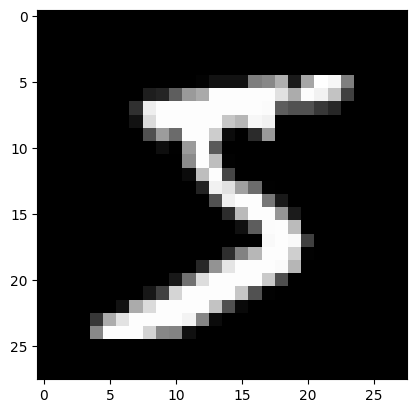

In [4]:
image = X[0].reshape(28,28)
plt.imshow(image, cmap='gray')

In [5]:
from sklearn.preprocessing import OneHotEncoder
X_train, y_train = X[0:60000], y[0:60000]
X_test, y_test = X[60000:], y[60000:]
encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))


In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)  # ✅ Learns from training data
X_test = scaler.transform(X_test)        # ✅ Applies same scaling to test


In [7]:

from sklearn.linear_model import LogisticRegression
# Creating the MultiOutput Classifier with Logistic Regression as the base estimator
classifier = LogisticRegression(max_iter=10000)

# Fitting the classifier on the training data
classifier.fit(X_train, y_train)

# Making predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the model, for example, using accuracy score
accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9219


In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_test, y_test, cv = 5)
print(score)

[0.8745 0.869  0.8915 0.9085 0.9075]


In [36]:
from PIL import Image
# convert to matrix form
matrix = np.array(Image.open("image7.jpg").convert('L'))

In [51]:
from helper import resize
# change background from white to black (invert)
inverted_image = 255 - matrix

# Resize if needed (ensure it's 28x28)
resized_image = resize(np.array(inverted_image))

# Flatten and reshape
x_input_flat = resized_image.reshape(1, -1)

X_tranform = scaler.transform(x_input_flat/255.0)

# Predict
pred = classifier.predict(X_tranform)
print(pred)


['5']


In [43]:
from joblib import dump, load

# Save your model
dump(classifier, 'classifier.joblib')

# Load your model later
loaded_model = load('classifier.joblib')

In [44]:
pred = loaded_model.predict(X_tranform)
print(pred)

['5']


In [42]:
x_input_flat.reshape(28,28)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.69387755e-01, 5.64234694e+01, 5.70969388e+01,
        1.64795918e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [41]:
X[0].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

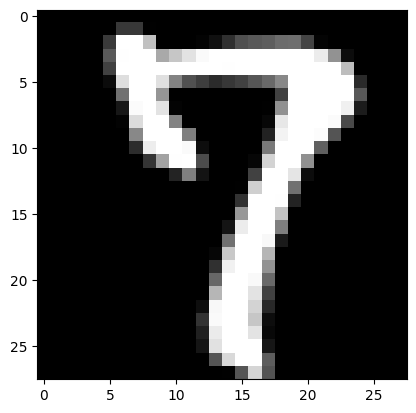

In [48]:
import matplotlib.pyplot as plt
plt.imshow(x_input_flat.reshape(28,28), cmap='gray')
